In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV subido
df = pd.read_csv("Data/housing.csv")
#del df['ocean_proximity']
df = pd.get_dummies(df)
df = df.fillna(df.mean())

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

nombres_limpios = [col.replace('<', '').replace('>', '').replace('[', '').replace(']', '') for col in X.columns]
X.columns = nombres_limpios

### Escalar datos y hacer PCA

In [33]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('pca', PCA())
     ])

pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [34]:
# Obten el objeto de PCA

objeto_pca = pipeline.named_steps['pca']
#objeto_pca.components_

In [35]:
X_pca = pipeline.transform(X)
x_componentes = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
x_componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.375111,1.858058,2.789762,0.099758,-1.382388,0.373647,1.788786,-0.024894,0.175938,-0.250550,0.145763,-0.067212,-4.844553e-15
1,2.617723,2.714887,2.781672,0.104062,-1.572170,0.445566,1.594817,-0.484008,-0.354827,0.039535,-0.027019,0.266951,-4.844553e-15
2,-2.257997,1.938945,2.938880,0.216968,-0.472146,0.173484,1.796909,0.459729,0.099150,-0.033039,0.104118,-0.048443,-4.289441e-15
3,-2.210764,2.030104,2.689386,0.237120,0.216221,0.005836,1.503468,0.155376,0.056837,-0.034649,0.077560,-0.038663,-4.178419e-15
4,-2.073292,2.149514,2.420998,0.262479,0.953494,-0.171632,1.202670,-0.152623,-0.101422,0.177669,0.009693,0.009757,-3.734330e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.154527,2.099671,-1.584531,-0.564314,0.335252,-0.097306,-0.718325,0.055053,-0.122448,0.099142,0.395915,0.137862,1.122896e-15
20636,-1.961548,1.937474,-1.691384,-0.673679,-0.509235,0.085962,-0.694854,-0.281484,-0.018039,0.067396,0.374592,0.090721,9.008516e-16
20637,-0.559456,2.212189,-1.701540,-0.615767,0.011015,-0.025403,-0.828813,-0.308924,-0.200370,0.077075,0.320970,0.138308,1.122896e-15
20638,-0.969095,2.162271,-1.677224,-0.624498,-0.084631,-0.005064,-0.808155,-0.270878,-0.238012,0.069520,0.294299,0.108453,1.122896e-15


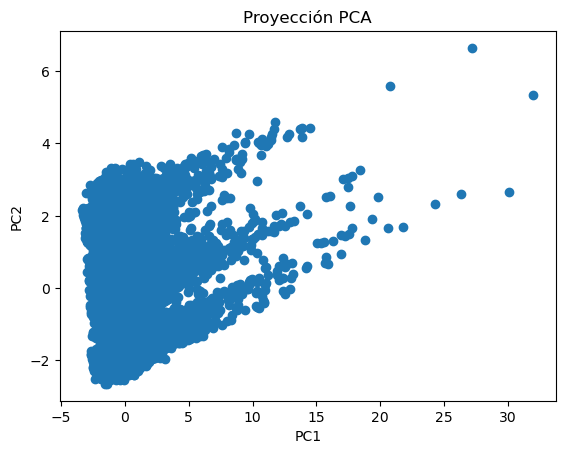

In [36]:
plt.scatter(x_componentes['PC1'], x_componentes['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA')
plt.show()

### Varianza explicada

Si la primera componente principal se obtiene con el eigenvalor que máximiza la varianza.

La varianza explicada por cada componente principal 

$$varianza_i = \frac{Eigenvalor_i}{\Sigma{Eigenvalores}}$$


In [37]:
objeto_pca.explained_variance_ratio_[0]

0.30154289877695245

In [38]:
objeto_pca.explained_variance_ratio_[1]

0.1973865652732001

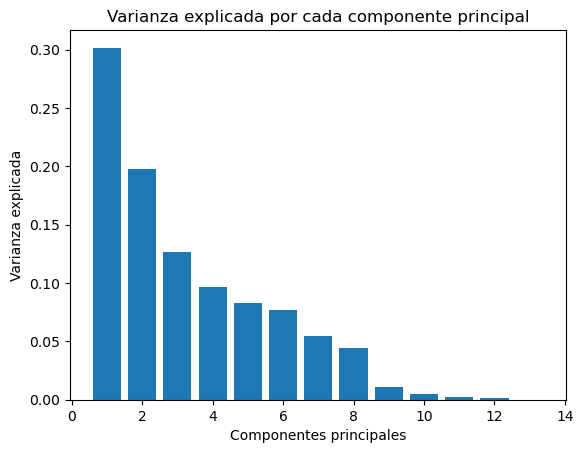

In [39]:
plt.bar(range(1, len(objeto_pca.explained_variance_ratio_)+1), objeto_pca.explained_variance_ratio_)
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

### Entendiendo primera componente

In [40]:
componente1 = pd.DataFrame({
     'features': X.columns,
     'pesos': objeto_pca.components_[0]
})
componente1

,features,pesos
0,longitude,0.101538
1,latitude,-0.099569
2,housing_median_age,-0.220563
3,total_rooms,0.478316
4,total_bedrooms,0.484269
5,population,0.469222
6,households,0.486598
7,median_income,0.048330
8,ocean_proximity_1H OCEAN,0.057847
9,ocean_proximity_INLAND,-0.012784


In [41]:
componente2 = pd.DataFrame({
     'features': X.columns,
     'pesos': objeto_pca.components_[1]
})
componente2

,features,pesos
0,longitude,-0.515239
1,latitude,0.563595
2,housing_median_age,-0.026872
3,total_rooms,0.100905
4,total_bedrooms,0.090788
5,population,0.052088
6,households,0.085387
7,median_income,-0.088896
8,ocean_proximity_1H OCEAN,-0.435594
9,ocean_proximity_INLAND,0.290002


### Entendiendo segunda componente

### Obtener las componentes principales

pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [42]:

# Transformar los datos

# Crear DataFrame con nombres de columnas


### Visualizar componentes principales

## Modelos de datos

### Primero con todos los features

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

model = XGBRegressor().fit(X, y)
predicciones = model.predict(X)
r2 = r2_score(y, predicciones)
print(f"R2: {r2:.4f}")

R2: 0.9310


### Ahora con las componentes principales

In [44]:
x_pc12 = x_componentes[['PC1', 'PC2']]

model = XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2 = r2_score(y, predicciones)
print(f"R2: {r2:.4f}")

R2: 0.3313


### Ahora solo con las primeras 3 componentes

In [45]:
x_pc12 = x_componentes[['PC1', 'PC2', 'PC3', 'PC4']]

model = XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2 = r2_score(y, predicciones)
print(f"R2: {r2:.4f}")

R2: 0.7924


In [46]:
model = XGBRegressor().fit(x_componentes, y)
predicciones = model.predict(x_componentes)
r2 = r2_score(y, predicciones)
print(f"R2: {r2:.4f}")

R2: 0.9082


In [47]:
importancias = pd.DataFrame({
     'features': x_componentes.columns,
     'importancia': model.feature_importances_
})
importancias = importancias.sort_values('importancia', ascending=False)
importancias

,features,importancia
5,PC6,0.336416
2,PC3,0.257811
7,PC8,0.083134
6,PC7,0.070897
8,PC9,0.055073
4,PC5,0.043600
9,PC10,0.035811
10,PC11,0.031332
3,PC4,0.027332
1,PC2,0.018020


### Conclusión: a medida que agregamos más componentes aumenta el poder predictivo pero se pierde el objetivo inicial que es tener menos dimensiones

### Clustering + PCA

In [48]:
from sklearn.cluster import KMeans

pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('kmeans', KMeans(n_clusters=3))
])
pipeline.fit(X)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3))])

In [49]:
x_componentes['cluster'] = pipeline.predict(X) + 1

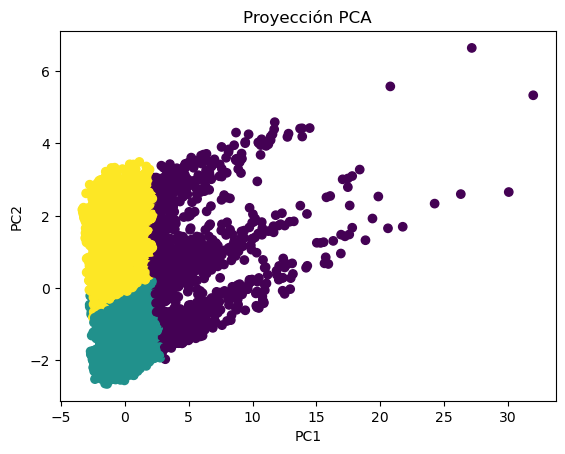

In [50]:
plt.scatter(x_componentes['PC1'], x_componentes['PC2'], c=x_componentes['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA')
plt.show()